<a href="https://colab.research.google.com/github/Advait177013/ML_CSE4020/blob/main/linear_regression_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
mydata=pd.DataFrame()
mydata[0]=np.arange(1, 6)
mydata[1]=[2, 1, 3, 6, 9]
mydata.columns=["x", "y"]
mydata


,x,y
0,1,2
1,2,1
2,3,3
3,4,6
4,5,9


Text(0, 0.5, 'Real Y Values')

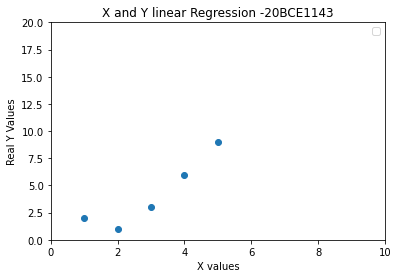

In [14]:
plt.scatter(mydata['x'], mydata['y'])
plt.title("X and Y linear Regression -20BCE1143")
plt.xlim(0,10)
plt.ylim(0,20)
plt.legend()
plt.xlabel("X values")
plt.ylabel("Real Y Values")

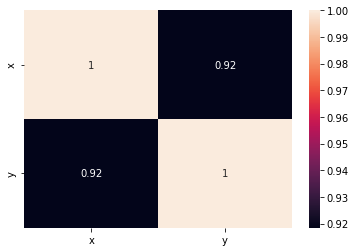

In [16]:
import seaborn as sb
md_corr=mydata.corr()
sb.heatmap(md_corr, annot=True)
#0.92 correlation btw x and y

r =  0.9183996645933805 (correlation coefficient)
m =  1.8999999999999997 (slope)
c =  -1.4999999999999991 (intercept)


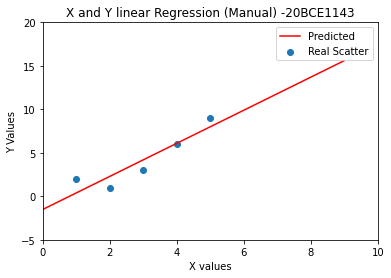

In [62]:
#manual, boring calculation for linear regression
#r=(n.sum(x*y)-sum(x)*sum(y))/(sqrt(n.sum(x^2)-(sum(x))^2)(n.sum(y^2)-(sum(y))^2))
#or the simpler version (pearson's for a sample, in both case)
#r=mean of products of standard scores (z-scores) -> (sum of ((xi-meanx)/stdx * (yi-meany)/stdy)) / (n-1)
myx=np.asanyarray(mydata[['x']])
myy=np.asanyarray(mydata[['y']])
n=myx.size
sumxy=np.sum(myx*myy)
sumx=np.sum(myx)
sumy=np.sum(myy)
numerator=n*sumxy-sumx*sumy
sumx2=np.sum(np.square(myx))
sumy2=np.sum(np.square(myy))
sqsumx=np.square(sumx)
sqsumy=np.square(sumy)
d1=n*sumx2-sqsumx
d2=n*sumy2-sqsumy
denominator=np.sqrt(d1*d2)
corr_coeff=numerator/denominator
print("r = ",corr_coeff, "(correlation coefficient)")
stdx=np.std(myx)
stdy=np.std(myy)
m=corr_coeff*(stdy/stdx)
c=np.mean(myy)-m*np.mean(myx)
plt.scatter(mydata['x'], mydata['y'], label="Real Scatter")
plt.title("X and Y linear Regression (Manual) -20BCE1143")
plt.xlim(0,10)
plt.ylim(-5,20)
plt.xlabel("X values")
plt.ylabel("Y Values")
testx=np.arange(0, 10, 1)
print("m = ", m, "(slope)")
print("c = ", c, "(intercept)")
plt.plot(testx, m*testx+c, '-r', label="Predicted")
plt.legend()

m =  [[1.9]] (slope)
c =  [-1.5] (intercept)


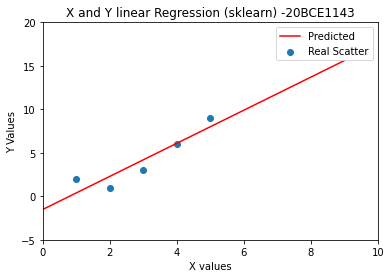

In [63]:
from sklearn import linear_model
regress=linear_model.LinearRegression()
regress.fit(myx, myy)
print("m = ",regress.coef_, "(slope)")
print("c = ", regress.intercept_, "(intercept)")
plt.scatter(mydata['x'], mydata['y'], label="Real Scatter")
plt.title("X and Y linear Regression (sklearn) -20BCE1143")
plt.xlim(0,10)
plt.ylim(-5,20)
plt.xlabel("X values")
plt.ylabel("Y Values")
plt.plot(testx, regress.coef_[0][0]*testx+regress.intercept_[0], '-r', label="Predicted")
plt.legend()

In [68]:
#performance measurement
from sklearn import metrics
y_pred_man=np.empty(5, dtype=float)
for i in range(5):
  y_pred_man[i]=myx[i]*m+c

y_pred_skl=regress.predict(myx)
mydata['man predicted']=y_pred_man
mydata['skl predicted']=y_pred_skl
mydata

,x,y,man predicted,skl predicted
0,1,2,0.4,0.4
1,2,1,2.3,2.3
2,3,3,4.2,4.2
3,4,6,6.1,6.1
4,5,9,8.0,8.0


In [75]:
#metrics
print("mean abs error - manual : \t", metrics.mean_absolute_error(myy, y_pred_man))
print("mean abs error - auto : \t", metrics.mean_absolute_error(myy, y_pred_skl))
print("mean sqr error - manual : \t", metrics.mean_squared_error(myy, y_pred_man))
print("mean sqr error - auto : \t", metrics.mean_squared_error(myy, y_pred_skl))
print("rmse error - manual : \t", metrics.r2_score(myy, y_pred_man))
print("rmse error - auto : \t", metrics.r2_score(myy, y_pred_skl))

mean abs error - manual : 	 1.04
mean abs error - auto : 	 1.04
mean sqr error - manual : 	 1.3400000000000003
mean sqr error - auto : 	 1.3399999999999999
rmse error - manual : 	 0.8434579439252337
rmse error - auto : 	 0.8434579439252337


In [80]:
#ex 2 - predict fat based on cat
fatlol=pd.DataFrame()
fatlol[0]=["Java", "OS", "Micro", "DRTS", "DAA"]
fatlol[1]=[2400/30, 2000/30, 1900/30, 2300/30, 1400/30]
fatlol[2]=[65, 67, 80, 80, 80]
fatlol.columns=["subj name", "cat 1", "fat"]
fatlol
#toc fat 90/100, cat 26/30

,subj name,cat 1,fat
0,Java,80.000000,65
1,OS,66.666667,67
2,Micro,63.333333,80
3,DRTS,76.666667,80
4,DAA,46.666667,80


m =  [[-0.29032258]] (slope)
c =  [93.75483871] (intercept)


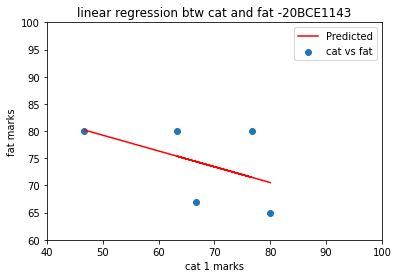

In [85]:
mycat=np.asanyarray(fatlol[['cat 1']])
myfat=np.asanyarray(fatlol[['fat']])

from sklearn import linear_model
regress=linear_model.LinearRegression()
regress.fit(mycat, myfat)
print("m = ",regress.coef_, "(slope)")
print("c = ", regress.intercept_, "(intercept)")
plt.scatter(fatlol['cat 1'], fatlol['fat'], label="cat vs fat")
plt.title("linear regression btw cat and fat -20BCE1143")
plt.xlim(40,100)
plt.ylim(60,100)
plt.xlabel("cat 1 marks")
plt.ylabel("fat marks")
plt.plot(mycat, regress.coef_[0][0]*mycat+regress.intercept_[0], '-r', label="Predicted")
plt.legend()

In [94]:
pred_y=regress.predict([[2600/30]])
print("predicted ToC marks \t:", pred_y[0][0])
print("actual ToC marks \t: 90")
print("accruacy checks")
pred_y1=regress.predict(mycat)
fatlol['predicted']=pred_y1
fatlol

predicted ToC marks 	: 68.59354838709677
actual ToC marks 	: 90
accruacy checks


,subj name,cat 1,fat,predicted
0,Java,80.000000,65,70.529032
1,OS,66.666667,67,74.400000
2,Micro,63.333333,80,75.367742
3,DRTS,76.666667,80,71.496774
4,DAA,46.666667,80,80.206452


In [95]:
print("mean abs error - auto : \t", metrics.mean_absolute_error(myfat, pred_y1))
print("mean sqr error - auto : \t", metrics.mean_squared_error(myfat, pred_y1))
print("rmse error - auto : \t", metrics.r2_score(myfat, pred_y1))

mean abs error - auto : 	 5.254193548387098
mean sqr error - auto : 	 35.82709677419355
rmse error - auto : 	 0.2447913833433062
